In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('../forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.shape

(517, 13)

In [4]:
df['area'].mean()

12.847292069632493

In [5]:
notAffected = df[df['area']==0]
notAffected

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [6]:
mostlyAffected = df[df['area'] > 13 ]
mostlyAffected

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
203,8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
204,5,6,mar,sat,90.6,50.1,100.4,7.8,15.1,64,4.0,0.0,13.99
205,4,5,sep,thu,92.9,137.0,706.4,9.2,22.1,34,1.8,0.0,14.57
206,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54
504,4,3,aug,wed,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59


In [7]:
partiallyAffected = df[(df['area']  <= 13 ) & (df['area']  > 0 )  ]
partiallyAffected

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1,2,aug,thu,91.0,163.2,744.4,10.1,26.7,35,1.8,0.0,5.80
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44


In [8]:
mergedDataset = pd.concat([partiallyAffected,mostlyAffected])
mergedDataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54
504,4,3,aug,wed,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59


In [9]:
df.sort_values("temp",ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54
484,2,5,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,26.43
496,4,5,aug,mon,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,2.77
492,1,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00
491,4,4,aug,thu,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03
277,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73
276,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85
282,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00


In [10]:
df.sort_values("wind",ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13
475,2,5,jun,thu,93.7,121.7,350.2,18.0,22.7,40,9.4,0.0,3.19
168,6,5,mar,fri,91.2,48.3,97.8,12.5,14.6,26,9.4,0.0,2.53
411,7,4,feb,fri,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,4.62
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,6,5,aug,wed,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
188,6,4,mar,sat,90.8,41.9,89.4,7.9,13.3,42,0.9,0.0,7.40
258,3,4,aug,sat,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.00


In [11]:
df.sort_values("area",ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,4,mar,sat,91.7,35.8,80.8,7.8,11.6,30,6.3,0.0,0.00
115,3,5,mar,tue,88.1,25.7,67.6,3.8,15.5,27,6.3,0.0,0.00
114,3,4,mar,tue,88.1,25.7,67.6,3.8,15.8,27,7.6,0.0,0.00
113,3,4,sep,mon,91.8,78.5,724.3,9.2,18.9,35,2.7,0.0,0.00


In [12]:
TransData = df.transpose()
TransData

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
X,7,7,7,8,8,8,8,8,8,7,...,2,1,5,6,8,4,2,7,1,6
Y,5,4,4,6,6,6,6,6,6,5,...,4,2,4,5,6,3,4,4,4,3
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.0,91.0,81.6,81.6,81.6,81.6,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
RH,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31


In [13]:
df1=df.drop(['month','day'],axis=1)

<Axes: >

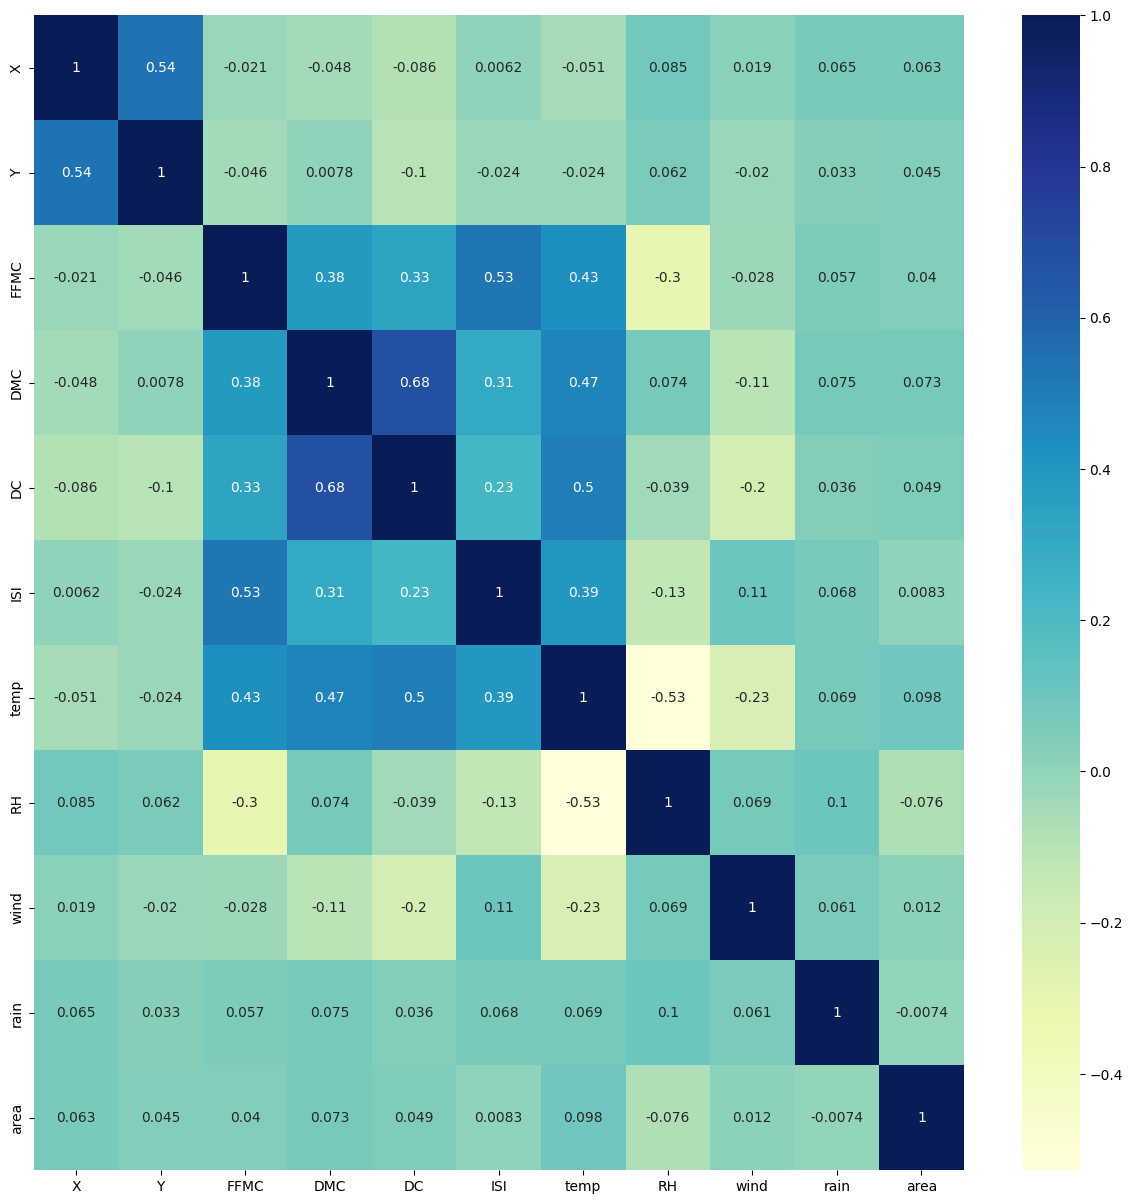

In [21]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,cmap='YlGnBu')

In [15]:
melting_result = pd.melt(frame=df1,id_vars=["area","temp"],value_vars=["wind","rain"])
melting_result

,area,temp,variable,value
0,0.00,8.2,wind,6.7
1,0.00,18.0,wind,0.9
2,0.00,14.6,wind,1.3
3,0.00,8.3,wind,4.0
4,0.00,11.4,wind,1.8
...,...,...,...,...
1029,6.44,27.8,rain,0.0
1030,54.29,21.9,rain,0.0
1031,11.16,21.2,rain,0.0
1032,0.00,25.6,rain,0.0


In [16]:
df3=df.iloc[:,[0,1,8,10,11,12]]

In [17]:
df2=df3.pivot_table(index=["temp","wind","rain"])
df2.head(10)

X    Y    area
temp wind rain                   
2.2  4.9  0.0   4.00  6.0   9.270
4.2  4.0  0.0   6.00  3.0   0.000
4.6  0.9  0.0   2.00  2.0   6.840
     6.3  0.0   6.00  5.0   5.390
     8.5  0.0   3.75  4.0  15.095
4.8  8.5  0.0   4.00  6.0   8.980
5.1  4.9  0.0   4.00  6.0   5.380
     5.4  0.0   6.00  4.0   2.140
     5.8  0.0   7.00  4.0  26.000
     8.0  0.0   8.00  6.0  11.190